In [8]:
import requests
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

## Prueba API

In [5]:
# Convertir una imagen a Base64
with open("/home/jrbeduardo/entrevistas/proyecto-cancer/images/SOB_B_TA-14-16184CD-400-001.png", "rb") as img_file:
    img_base64 = base64.b64encode(img_file.read()).decode("utf-8")

# URL pública de ngrok (Reemplázala con la que se generó en Colab)
url = "https://fd7e-35-198-239-245.ngrok-free.app/predict/"


In [6]:
# Enviar la imagen a la API
response = requests.post(url, json={"image_base64": img_base64})

In [7]:
if response.status_code == 200:
    resultado = response.json()
    print(resultado)
else:
    print("Error:", response.text)

{'prediccion': 'Benigno', 'confianza': '1.0000', 'imagen_gradcam': 'iVBORw0KGgoAAAANSUhEUgAAArwAAAHMCAIAAAC4EuxIAAAgAElEQVR4AUzBMY6t2bql5XeMOdeK2JE785xbojtgVguwsMpAQsJEdAEfE2HRBoSLRAuwsMChDVXn7oz4/2+OwYq8l4Ln0X/5P/3fG22WT3yqOfP5df3zn9fX55//+PXrz1/31zVJUdpojcTj+fbbz9//6d98/Pxjvb9rP8FgZBCVkIDUqJMzpzPnnrnvmTuAzDJm78d+PryXraYPL2PDOTP3/fX1lYRle3mv5bX24qXknOQ4NDkz55rOnJkzkxwQ4sWSrOXlLX8TEpKQjUQAAeGbXzASFWCvJWkt05iNaisNL4FSsbyNFkuBE07m6z5f9z0v58xpk0MSIGQ/9/P5fP/xgXi+PVE1nblV5b5n7vm68jVzXzmHBNpJU3KgJE2a5gxNGlqlxUAgIRCQ19pL67meb36+Pd6ez4+PtR5+PLS3HttrAxGPx8a0cEihhTZ02nJOSJFy6vLiYi9Qp2dOSdPkZIBAjA25Z69NO/fJfc/XPXdy4oaQIWea0hcaFdlbWLIBSahgmhfK/8v4Ze/lF0knPZOXcxlKSJqgrmXcpYUKeZF8Jl7ee/ll24i/+GV5yfu5JSZz39fXrz/nun9dv+a6DG4RM8eSHzJMEpiZA8d5vL/vH++//dMfH//09z/+6T/Zzzd5JXzdMylVQNsy3va298KwW5DFf2QIoTYgqCyJnAoUhWYI3F9zDi7Gazlpo8zMdZNSBIbOnHvOfZ/7bkaNWs3pGWbm6yrTMyQWSZBkyota/qJaAcsByQhkpEp8W1gFLa3HQ3vLy2tVZhFAthcyVRXJBdsyRt4CvC2QKoqCkhy1M3cT22uvoIS0ldZ+7OfDXtCkwhIIGxLSmUlPTkJLqbQM2muzAIeWSl5r7+de24DlJCUR

## Visualización

In [9]:
def mostrar_imagen_base64(base64_string):
    """
    Decodifica una imagen en formato Base64 y la muestra.

    Parámetros:
        - base64_string: Cadena en Base64 de la imagen.
    """
    # Decodificar la imagen Base64
    image_data = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(image_data))

    # Mostrar la imagen con Matplotlib
    plt.imshow(image)
    plt.axis("off")  # Ocultar ejes
    plt.show()

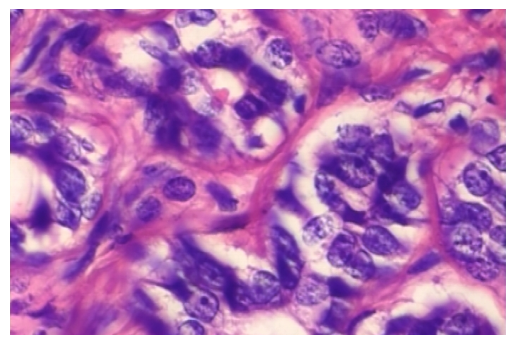

In [11]:
mostrar_imagen_base64(img_base64)

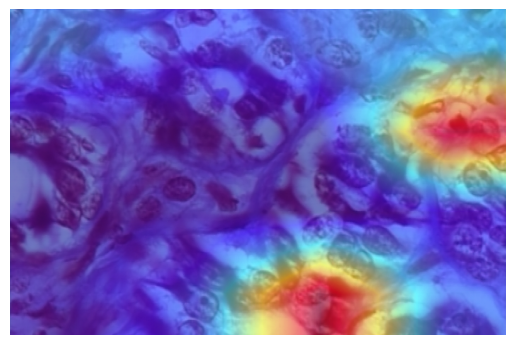

In [10]:
mostrar_imagen_base64(resultado['imagen_gradcam'])